# Importing Libraries

In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# Reading Dataset

In [52]:
df = pd.read_csv('new_data.csv',encoding='ISO-8859-1')

In [53]:
df.head()

,Rating,Review
0,5,Awesome classy phone everything is good ...val...
1,5,Im having a great experience with this better ...
2,5,"Camera is not as great as poco x3 pro, but it ..."
3,5,Poco has made its hard phone camera quality is...
4,4,Received the phone today. Thanks to Flipkart w...


lets assume:
* positive - 5,4
* negative - 3,2,1

<AxesSubplot:xlabel='Rating', ylabel='count'>

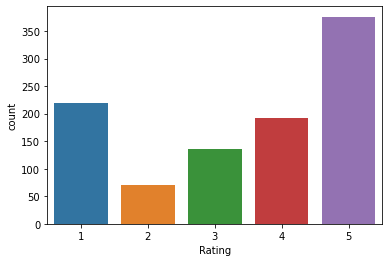

In [54]:
sns.countplot(df['Rating'])

In [55]:
# a = []
# for i in df['Rating']:
  
#     if i == 5 or i == 4: 
#         a.append('positive')
#     if i == 3 or i == 2 or i == 1:
#         a.append('negative')
# df['new_Rating'] = a

In [56]:
df['Rating'] = df['Rating'].replace(to_replace = {5:'positive',4:'positive',3:'negative',2:'negative',1:'negative'})

In [57]:
df

,Rating,Review
0,positive,Awesome classy phone everything is good ...val...
1,positive,Im having a great experience with this better ...
2,positive,"Camera is not as great as poco x3 pro, but it ..."
3,positive,Poco has made its hard phone camera quality is...
4,positive,Received the phone today. Thanks to Flipkart w...
...,...,...
989,positive,"just one word ""Excellent""READ MORE"
990,positive,Outstanding very smooth performance.READ MORE
991,positive,Good productREAD MORE
992,negative,Verma quality not goodREAD MORE


<AxesSubplot:xlabel='Rating', ylabel='count'>

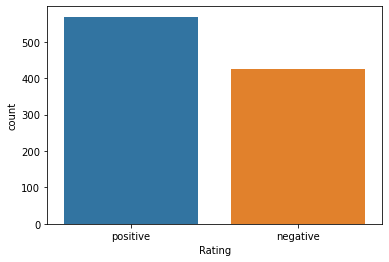

In [58]:
sns.countplot(df['Rating'])

In [59]:
df['Rating'].value_counts(normalize=True)

positive    0.572435
negative    0.427565
Name: Rating, dtype: float64

In [60]:
df['Review'][0]

'Awesome classy phone everything is good ...value for money... But camera needs to more improve by updateREAD MORE'

In [61]:
df['Review'] = df['Review'].str.replace('READ MORE','')

In [62]:
df['Review'][0]

'Awesome classy phone everything is good ...value for money... But camera needs to more improve by update'

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  994 non-null    object
 1   Review  994 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


# NLP

# Step in NLP
1. Remove punct
2. unwanted text remove
3. Stopwords
4. lower converstion
5. token
6. stemming/ lemma
7. word embedding (text to number) (countvectorizer/bow/tfidf/glove)

# Importing libraries

In [64]:
import nltk
import re 

In [65]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords as sw
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
print(sw.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [67]:
len(sw.words('english'))

179

In [68]:
wd = WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('^[a-zA-Z]','',df['Review'][i])
    review = review.lower()
    review = review.split() 
    review = [wd.lemmatize (word) for word in review if not word in sw.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [69]:
corpus

['wesome classy phone everything good ...value money... camera need improve update',
 'great experience better charging progress long life battery amazing camera performance personally loved mobile phone also best gaming experience hope u also like phone #poco x 4 pro 5g',
 'amera great poco x3 pro, great, selfie cam awesome. battery good, charge super fast. great buy',
 'oco made hard phone camera quality awesome . yellow color phone super shinning back . played bmi game worked well . charging . ccharges 40 minute . awesome price buy this. dual stereo speaker hearing music watching movie super.',
 'eceived phone today. thanks flipkart super fast delivery. ordered yellow colour mom appeared classy. inside box, phone, adaptor, case original bill. well, two thing say. yes, handset actually look good eye feel premium hand. battery good. could see phone charging 100% within 30 minute used phone throughout day still 51%. camera decent enough make cap...',
 'lthough alrounder 5g phone spec c

In [70]:
cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [71]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
y = df['Rating'].iloc[:].values

In [73]:
y

array(['positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'negative', 'positive', 'negative', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'positive', 'positi

In [74]:
# train test split

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2,random_state = 42)

In [76]:
# Model Building

In [77]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model_gnb = GaussianNB()
model_gnb.fit(x_train,y_train)

GaussianNB()

In [78]:
# Y-pred

In [79]:
y_pred = model_gnb.predict(x_test)

In [80]:
### Training accuracy

In [81]:
print('taining accuracy is ' + str(model_gnb.score(x_train,y_train)*100))

taining accuracy is 90.44025157232704


In [82]:
print('test accuracy is ' + str(model_gnb.score(x_test,y_test)*100))

test accuracy is 77.88944723618091


In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
cm = confusion_matrix(y_test,y_pred)

In [85]:
cm

array([[58, 35],
       [ 9, 97]], dtype=int64)

In [86]:
cr = classification_report(y_test,y_pred)

In [87]:
print(cr)

              precision    recall  f1-score   support

    negative       0.87      0.62      0.72        93
    positive       0.73      0.92      0.82       106

    accuracy                           0.78       199
   macro avg       0.80      0.77      0.77       199
weighted avg       0.80      0.78      0.77       199



In [88]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [89]:
y_pred = model_mnb.predict(x_test)

In [90]:
print('training accuracy is ' + str(model_mnb.score(x_train,y_train)*100))

taining accuracy is 94.46540880503144


In [91]:
print('test accuracy is ' + str(model_mnb.score(x_test,y_test)*100))

taining accuracy is 86.4321608040201


In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [93]:
cm = confusion_matrix(y_test,y_pred)

In [94]:
cm

array([[ 72,  21],
       [  6, 100]], dtype=int64)

In [95]:
cr = classification_report(y_test,y_pred)

In [96]:
print(cr)

              precision    recall  f1-score   support

    negative       0.92      0.77      0.84        93
    positive       0.83      0.94      0.88       106

    accuracy                           0.86       199
   macro avg       0.87      0.86      0.86       199
weighted avg       0.87      0.86      0.86       199



In [97]:
# Hyper Tuning